In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
file_path = "./Patreon.csv"
df = pd.read_csv(file_path)

df.head(10)

,Rank,Creator_URL,Creator,Creator1,Patrons,DaysRunning,Launched
0,1,https://graphtreon.com/creator/TrueCrimeObsessed,True Crime Obsessed is creating podcasts of th...,True Crime Obsessed,36661,921,Jan-18
1,2,https://graphtreon.com/creator/chapotraphouse,Chapo Trap House is creating Chapo Trap House ...,Chapo Trap House,34983,1539,May-16
2,3,https://graphtreon.com/creator/jimcantswim,Jim C. Swim is creating Criminology and Psycho...,Jim C. Swim,33940,558,Jan-19
3,4,https://graphtreon.com/creator/YagamiYato,"Yagami Yato is creating Vocal Artistry, ASMR, ...",Yagami Yato,28431,781,Jun-18
4,5,https://graphtreon.com/creator/mrshiu,è•­è‹¥å…ƒèªª is creating knowledge (mrshiu),è•­è‹¥å…ƒèªª,26070,340,Sep-19
5,6,https://graphtreon.com/creator/summertimesaga,DarkCookie is creating Summertime Saga (summer...,DarkCookie,24445,1454,Aug-16
6,7,https://graphtreon.com/creator/humansofnewyork,Brandon Stanton is creating Humans of New York...,Brandon Stanton,20424,720,Aug-18
7,8,https://graphtreon.com/creator/theconsciouskid,The Conscious Kid is creating Parenting and Ed...,The Conscious Kid,16739,313,Oct-19
8,9,https://graphtreon.com/creator/tinymeatgang,TMG is creating the Tiny Meat Gang Podcast (ti...,TMG,16613,1030,Oct-17
9,10,https://graphtreon.com/creator/amandapalmer,Amanda Palmer is creating with no intermission...,Amanda Palmer,14969,1986,Mar-15


In [5]:
df.isnull().sum

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Rank         1000 non-null   int64 
 1   Creator_URL  1000 non-null   object
 2   Creator      1000 non-null   object
 3   Creator1     1000 non-null   object
 4   Patrons      1000 non-null   int64 
 5   DaysRunning  1000 non-null   int64 
 6   Launched     1000 non-null   object
dtypes: int64(3), object(4)
memory usage: 54.8+ KB


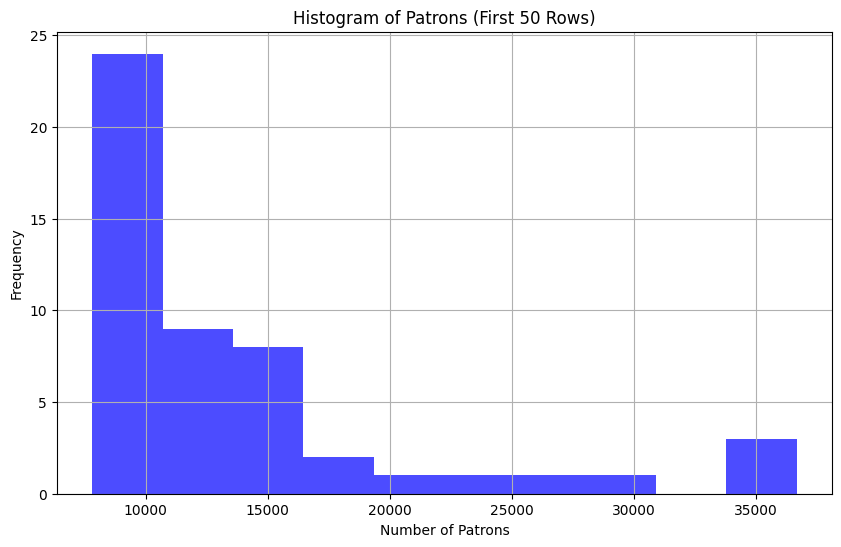

In [27]:
# 1. Histogram: Show distribution of 'Patrons' (First 50 rows)
plt.figure(figsize=(10, 6))
df_hist = df.head(50)  # Limit to first 50 rows
plt.hist(df_hist['Patrons'], bins=10, color='blue', alpha=0.7)
plt.title('Histogram of Patrons (First 50 Rows)')
plt.xlabel('Number of Patrons')
plt.ylabel('Frequency')
plt.grid()
plt.show()

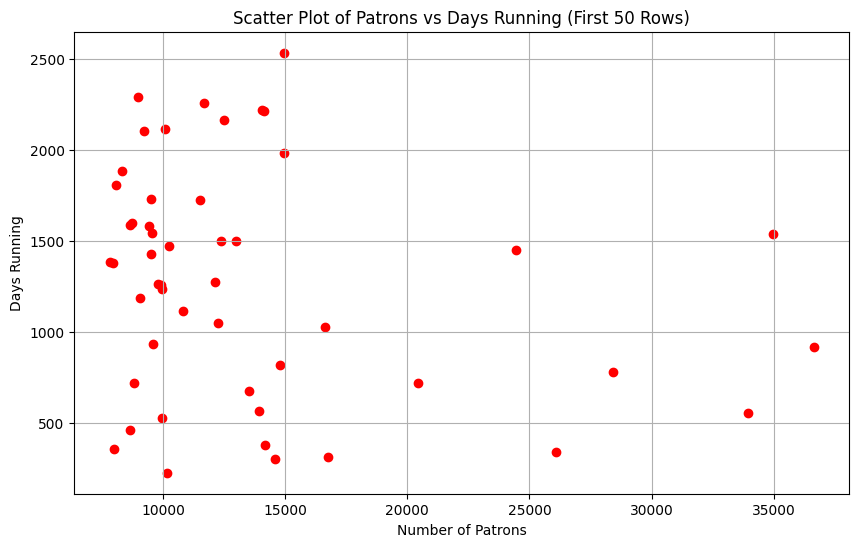

In [29]:
plt.figure(figsize=(10, 6))
df_scatter = df.head(50)  # Limit to first 50 rows
plt.scatter(df_scatter['Patrons'], df_scatter['DaysRunning'], color='red')
plt.title('Scatter Plot of Patrons vs Days Running (First 50 Rows)')
plt.xlabel('Number of Patrons')
plt.ylabel('Days Running')
plt.grid()
plt.show()

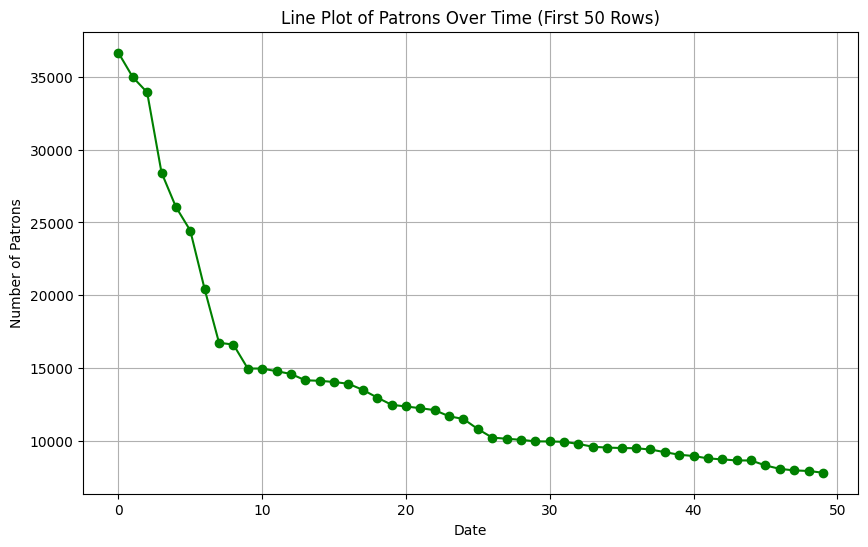

In [30]:
plt.figure(figsize=(10, 6))
df_line = df.head(50)  # Limit to first 50 rows
df_line['Patrons'].plot(color='green', marker='o')
plt.title('Line Plot of Patrons Over Time (First 50 Rows)')
plt.xlabel('Date')
plt.ylabel('Number of Patrons')
plt.grid()
plt.show()


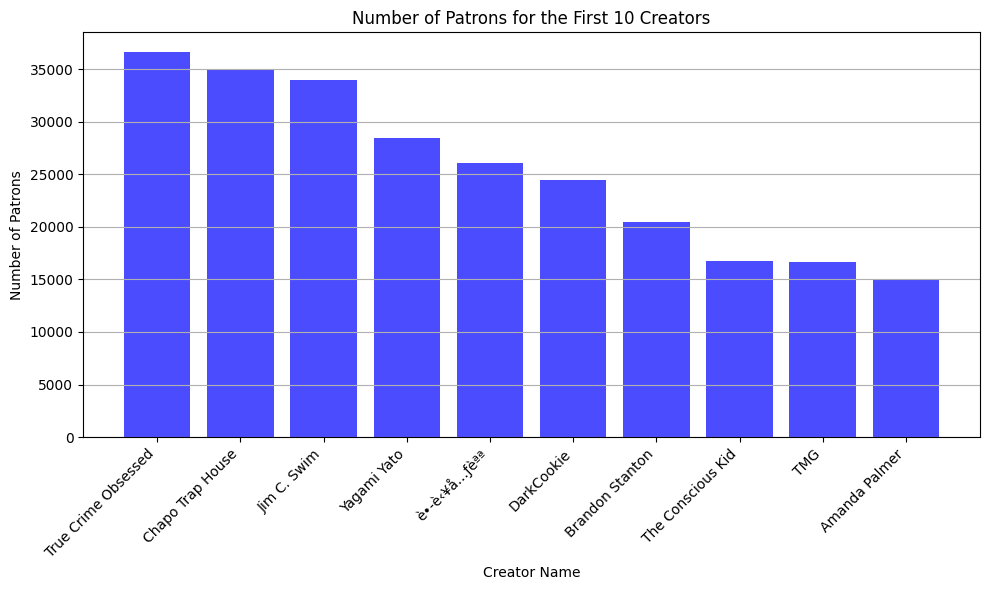

In [32]:
#Bargraph for first 10 creators and their number of patrons
df_bar = df.head(10)

# Create a bar graph
plt.figure(figsize=(10, 6))
plt.bar(df_bar['Creator1'], df_bar['Patrons'], color='blue', alpha=0.7)
plt.title('Number of Patrons for the First 10 Creators')
plt.xlabel('Creator Name')
plt.ylabel('Number of Patrons')
plt.xticks(rotation=45, ha='right')  # Rotate the labels for better readability
plt.grid(axis='y')

# Show the plot
plt.tight_layout()  # Adjust the layout so everything fits
plt.show()

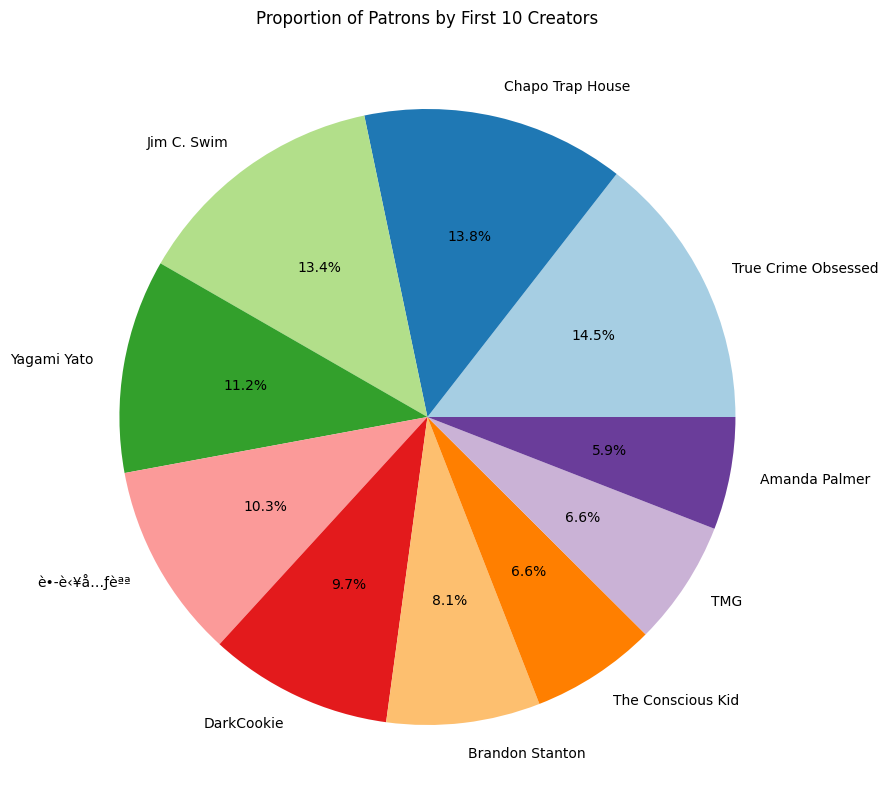

In [40]:
# Select the first 10 creators from the DataFrame
df_first_10 = df.head(10)

# Create a pie chart using the number of patrons for the first 10 creators
plt.figure(figsize=(10, 10))
plt.pie(df_first_10['Patrons'], 
        labels=df_first_10['Creator1'], 
        autopct='%1.1f%%', 
        colors=plt.cm.Paired.colors)

# Add title and display the plot
plt.title('Proportion of Patrons by First 10 Creators')
plt.show()

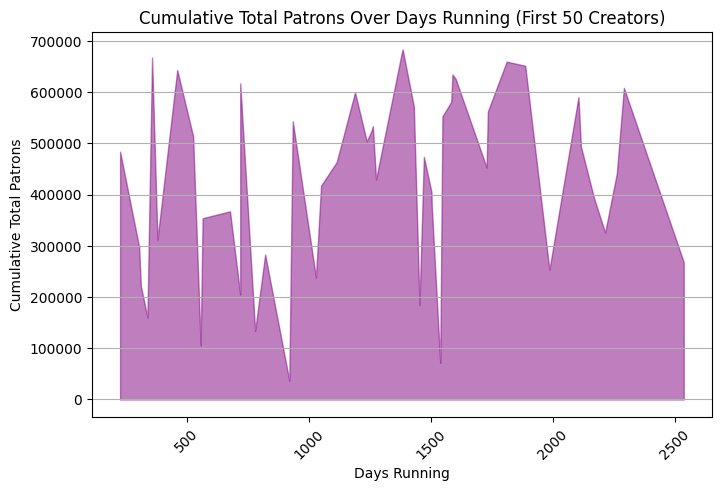

In [51]:
# Ensure the 'Launched' column is in datetime format
df['Launched'] = pd.to_datetime(df['Launched'], errors='coerce')

# Calculate cumulative patrons
df['Cumulative_Patrons'] = df['Patrons'].cumsum()

# Select the first 50 creators
df_first_200 = df.head(50)

# Create a new DataFrame with 'DaysRunning' and cumulative patrons
df_cumulative = df_first_200[['DaysRunning', 'Cumulative_Patrons']].drop_duplicates().sort_values('DaysRunning')

# Create an area plot
plt.figure(figsize=(8, 5))
plt.fill_between(df_cumulative['DaysRunning'], df_cumulative['Cumulative_Patrons'], color='purple', alpha=0.5)
plt.title('Cumulative Total Patrons Over Days Running (First 50 Creators)')
plt.xlabel('Days Running')
plt.ylabel('Cumulative Total Patrons')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y')

# Show the plot
plt.show()


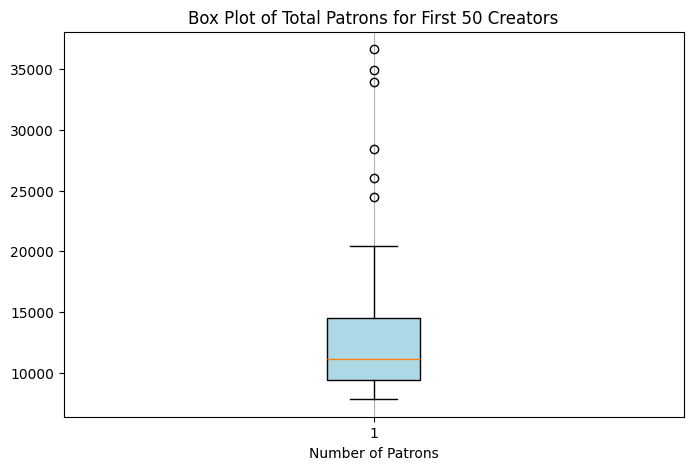

In [56]:
# Select the first 50 creators
df_first_50 = df.head(50)

# Create a box plot for total patrons
plt.figure(figsize=(8, 5))
plt.boxplot(df_first_50['Patrons'], vert=True, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title('Box Plot of Total Patrons for First 50 Creators')
plt.xlabel('Number of Patrons')
plt.grid(axis='x')

# Show the plot
plt.show()

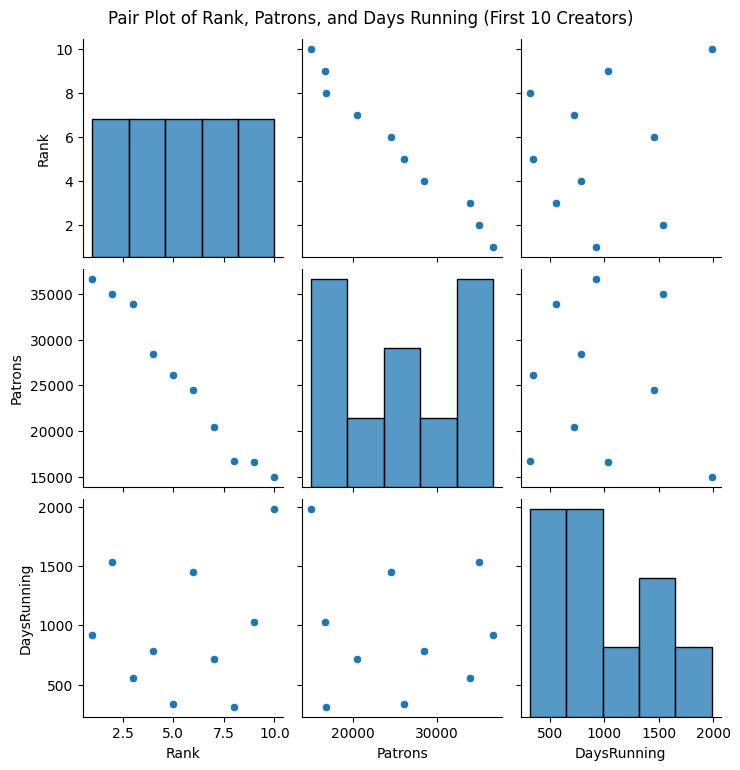

In [59]:
df_limited = df.head(10)

# Select relevant numeric columns: Rank, Patrons, DaysRunning
numeric_columns = df_limited[['Rank', 'Patrons', 'DaysRunning']]

# Create a pair plot
sns.pairplot(numeric_columns)
plt.suptitle('Pair Plot of Rank, Patrons, and Days Running (First 10 Creators)', y=1.02)
plt.show()